In [1]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os

In [2]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment10.csv"
load_raw_data = pd.read_csv(raw_data_path)
# combine detail
detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes'
path_name_after_no='_all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0/detail_e200.csv'
load_cellDancer=pd.DataFrame()
for i in range(1,11):
    detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
    detail=pd.read_csv(detail_path)
    load_cellDancer=load_cellDancer.append(detail)
load_cellDancer_bkup=load_cellDancer.copy()

In [3]:
# define cell velocity para
n_neighbors_list = [50, 100, 150, 200, 250, 300]
add_amt_gene_list = [200, 400, 600, 800, 1200, 1600, 2000]

In [4]:
# define output path
output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_velocity'


In [5]:
# # filter out out of bounds points
# load_cellDancer_new=pd.concat([load_cellDancer,load_raw_data[['embedding1','embedding2']]],axis=1)
# id_filter_out=((load_raw_data.embedding1<6) | (load_raw_data.embedding1>13) | (load_raw_data.embedding1<3))
# load_raw_data_cell_filter=load_raw_data[~id_filter_out].reset_index()
# load_cellDancer_cell_filter=load_cellDancer[~id_filter_out].reset_index()

In [6]:
# # DATA - four samples
# four_samples=['Smim1','Hba-x','Myo1b','Coro2b']
# # four_samples=['Smim1','Hba-x']
# load_raw_data_four_samples=[]
# load_cellDancer_four_samples=[]
# load_raw_data_four_samples=load_raw_data[load_raw_data.gene_list.isin(four_samples)].reset_index()
# load_cellDancer_four_samples=load_cellDancer[load_cellDancer.gene_name.isin(four_samples)].reset_index()

In [7]:
# # DATA - cutoff ratio of u,s after neighbor < 0.2
# from utilities import filter_by_neighbor_sample_parallel
# gene_list_keep_fin_pd=filter_by_neighbor_sample_parallel(load_raw_data,gene_amt_each_job=100)
# # gene_list_keep_fin_pd.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_velocity/gene_list_keep_fin_0.2cutoff.csv',index=False)
# gene_list_keep_fin_pd=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_velocity/cutoff0.2/gene_list_keep_fin_0.2cutoff_keep950geneInsteadOf1127.csv')
# load_raw_data_cf02_geneAmt952=[]
# load_cellDancer_cf02_geneAmt952=[]
# load_raw_data_cf02_geneAmt952=load_raw_data[load_raw_data.gene_list.isin(gene_list_keep_fin_pd.gene_list)].reset_index().copy()
# load_cellDancer_cf02_geneAmt952=load_cellDancer[load_cellDancer.gene_name.isin(gene_list_keep_fin_pd.gene_list)].reset_index().copy()

In [8]:
# load_raw_data_cf02_geneAmt952

In [9]:
# cell plot - main function
colors = {'Erythroid2':grove2[6],
'Blood progenitors 2':grove2[5],
'Erythroid3':grove2[4],
'Erythroid1':grove2[3],
'Blood progenitors 1':grove2[2],
'Haematoendothelial progenitors':grove2[1],
'Blood progenitors 1':grove2[0]}

n_neighbors_list=[10]
add_amt_gene_list=[952]
pca_n_components_list=[4]
mode_list=['gene','pca','pca_norm','embedding','umap']
transfer_mode_list=['log','2power','power10','2power_norm_multi10',None]
umap_n=10
umap_n_components_list=range(2,4) # 2d and 3d'

In [10]:
def tune_cell_velocity(load_raw_data,load_cellDancer):
    for n_neighbors in n_neighbors_list:
        print('------n_neighbors'+str(n_neighbors))
        for add_amt_gene in add_amt_gene_list:
            print('------add_amt_gene'+str(add_amt_gene))
            for transfer_mode in transfer_mode_list:
                for mode in mode_list:
                    for pca_n_components in pca_n_components_list: # pca
                        for umap_n in umap_n_list: # umap
                            for umap_n_components in umap_n_components_list: # umap
                                file_name_additional_info="_transfer"+str(transfer_mode)+'_mode'+str(mode)+'_pcaN'+str(pca_n_components)+"_umapN"+str(umap_n)+'_umapNcomponents'+str(umap_n_components)
                                save_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_velocity'
                                # velocity_cell_draft(load_raw_data_four_samples,load_cellDancer_four_samples,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True,gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='embedding')
                                # vpl.velocity_cell_map(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='gene')
                                # velocity_cell_map_umap_draft(load_raw_data_cf02_geneAmt952,load_cellDancer_cf02_geneAmt952,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n)
                                try:
                                    vpl.velocity_cell_map_curve(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components)
                                except:
                                    print("Exception: "+file_name_additional_info)

In [ ]:
# ['gene','embedding']
n_neighbors_list=[10]
add_amt_gene_list=[952]

mode_list=['gene','embedding']
transfer_mode_list=['log','2power','power10','2power_norm_multi10',None]

pca_n_components_list=[None] # 2d and 3d'
umap_n_list=[None]
umap_n_components_list=[None]

tune_cell_velocity(load_raw_data_cf02_geneAmt952,load_cellDancer_cf02_geneAmt952)

In [ ]:
# ['umap']
n_neighbors_list=[10]
add_amt_gene_list=[952]

mode_list=['umap']
transfer_mode_list=['log','2power','power10','2power_norm_multi10',None]

pca_n_components_list=[None] # 2d and 3d'
umap_n_list=[5,10]
umap_n_components_list=[2,3]

tune_cell_velocity(load_raw_data_cf02_geneAmt952,load_cellDancer_cf02_geneAmt952)

In [ ]:
# ['pca','pca_norm']
n_neighbors_list=[10]
add_amt_gene_list=[952]

mode_list=['pca','pca_norm']
transfer_mode_list=['log','2power','power10','2power_norm_multi10',None]

pca_n_components_list=[3,4,5]
umap_n_list=[None]
umap_n_components_list=[None]

tune_cell_velocity(load_raw_data_cf02_geneAmt952,load_cellDancer_cf02_geneAmt952)

In [13]:
# delete outliers
load_raw_data_cell_filter=load_raw_data[load_raw_data.embedding2>0].reset_index(drop=True)
load_cellDancer_cell_filter=load_cellDancer[load_raw_data.embedding2>0].reset_index(drop=True)

/Users/guangyuwang/opt/anaconda3/envs/celldancer/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
len(load_raw_data_cell_filter)/2000

9863.0

In [ ]:
load_cellDancer

,Unnamed: 0,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost
0,0,Hk1,0.311147,0.023061,0.343293,0.013184,0.003450,0.237919,0.015017,0.118257
1,1,Hk1,0.220703,0.043649,0.281857,0.025953,0.009087,0.229899,0.019629,0.118257
2,2,Hk1,0.300765,0.046840,0.367109,0.027165,0.006885,0.233345,0.017256,0.118257
3,3,Hk1,0.575079,0.037984,0.630540,0.020755,0.001926,0.244374,0.010401,0.118257
4,4,Hk1,0.452859,0.039503,0.509815,0.022012,0.003072,0.240537,0.012805,0.118257
...,...,...,...,...,...,...,...,...,...,...
2465795,12324,Syncrip,0.400352,0.079564,0.411125,0.115723,0.291026,0.136507,0.286526,0.070294
2465796,12325,Syncrip,0.260445,0.121604,0.325618,0.142444,0.264403,0.151068,0.283023,0.070294
2465797,12326,Syncrip,0.309220,0.125791,0.371167,0.146414,0.266806,0.149652,0.284371,0.070294
2465798,12327,Syncrip,0.282135,0.106819,0.331271,0.132887,0.272726,0.147093,0.283467,0.070294


In [ ]:
load_raw_data

,gene_list,u0,s0,cellID,clusters,embedding1,embedding2
0,Sox17,0.000000,0.043971,cell_363,Blood progenitors 2,3.460521,15.574629
1,Sox17,0.000000,0.000000,cell_382,Blood progenitors 2,2.490433,14.971734
2,Sox17,0.000000,0.018161,cell_385,Blood progenitors 2,2.351203,15.267069
3,Sox17,0.000000,0.000000,cell_393,Blood progenitors 2,5.899098,14.388825
4,Sox17,0.000000,0.000000,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...
24657995,Gm47283,0.214961,1.145533,cell_139318,Erythroid3,8.032358,7.603037
24657996,Gm47283,0.300111,1.072944,cell_139321,Erythroid3,10.352904,6.446736
24657997,Gm47283,0.292607,1.199875,cell_139326,Erythroid3,9.464873,7.261099
24657998,Gm47283,0.266031,1.114659,cell_139327,Erythroid3,9.990495,7.243880


In [ ]:
# load_cellDancer_cell_filter[load_cellDancer_cell_filter.gene_name=='Klf7']['Unnamed: 0'].drop_duplicates()
# load_cellDancer_cell_filter[load_cellDancer_cell_filter.gene_name=='Gm47283']['Unnamed: 0'][1:10]

1187766        0
1187767        1
1187768        2
1187769        3
1187770        4
           ...  
1203281    12324
1203282    12325
1203283    12326
1203284    12327
1203285    12328
Name: Unnamed: 0, Length: 9885, dtype: int64

In [ ]:
# colors={
#  'Haematoendothelial progenitors': '#017351',
#  'Blood progenitors 1': '#08A8CE',
#  'Blood progenitors 2': '#fbbf45',
#  'Erythroid1': '#03c383',
#  'Erythroid2': '#ef6a32',
#  'Erythroid3': '#aad962'
#  }

# colors = {'Erythroid2':grove2[6],
# 'Blood progenitors 2':grove2[5],
# 'Erythroid3':grove2[4],
# 'Erythroid1':grove2[3],
# 'Blood progenitors 1':grove2[2],
# 'Haematoendothelial progenitors':grove2[1],
# 'Blood progenitors 1':grove2[0]}

color_enmu

In [ ]:
# we finally choose mode='gene', transfer mode='power10'
# cellcase='filtered'
# ['gene']
n_neighbors_list=[10]
# add_amt_gene_list=[952]
add_amt_gene_list=[2000]

mode_list=['gene']
transfer_mode_list=['power10']

pca_n_components_list=[None] # 2d and 3d'
umap_n_list=[None]
umap_n_components_list=[None]

min_mass_list=[15]
grid_step_list=[20]
# color_list_full=[greenBlue]
#                                             'Haematoendothelial progenitors':color_list[6],
#                                             'Blood progenitors 1':color_list[4],
#                                             'Blood progenitors 2':color_list[3],
#                                             'Erythroid1':color_list[2],
#                                             'Erythroid2':color_list[1],
#                                             'Erythroid3':color_list[0]}

horizonExtra02=[# '#000436',
 '#021EA9',
 '#1632FB',
 '#6E34FC',
 # '#C732D5',
 # '#FD619D',
 '#FF9965',
 '#FFD32B',
 '#FFFC5A']
color_list_full=[horizonExtra02]

solarExtra02=['#3361A5',
 '#248AF3',
 '#14B3FF',
 '#88CEEF',
 # '#C1D5DC',
 # '#EAD397',
 '#FDB31A',
 '#E42A2A',
 # '#A31D1D'
             ]

solarEx_horizonEx=['#3361A5',
 '#248AF3',
 '#14B3FF',
 '#FF9965',
 '#FFD32B',
 '#FFFC5A']

solarEx_horizonEx02=['#021EA9',
 '#248AF3',
 '#14B3FF',
 '#FF9965',
 '#FFD32B',
 '#FFFC5A']

blue01_set=['#1900B3',
 '#0030C7',
 '#007CD7',
 '#13C5E4',
 '#30EDE2',
 '#BBFDE2']

blue02_set=['#52009E',
 '#1900B3',
 '#007CD7',
 '#13C5E4',
 '#30EDE2',
 '#BBFDE2']

blue03_set=['#770087',
 '#1900B3',
 '#007CD7',
 '#13C5E4',
 '#30EDE2',
 '#BBFDE2']
color_list_full=[blue03_set]


# tune_cell_velocity_debug_curve(load_raw_data_cf02_geneAmt952,load_cellDancer_cf02_geneAmt952)
tune_cell_velocity_debug_curve(load_raw_data,load_cellDancer)

In [127]:
def tune_cell_velocity_debug_curve(load_raw_data,load_cellDancer):
    for n_neighbors in n_neighbors_list:
        print('------n_neighbors'+str(n_neighbors))
        for add_amt_gene in add_amt_gene_list:
            print('------add_amt_gene'+str(add_amt_gene))
            for transfer_mode in transfer_mode_list:
                for mode in mode_list:
                    for pca_n_components in pca_n_components_list: # pca
                        for umap_n in umap_n_list: # umap
                            for umap_n_components in umap_n_components_list: # umap
                                for min_mass in min_mass_list:
                                    for grid_step in grid_step_list:
                                        for color_enmu,color_list in enumerate(color_list_full):
                                            colors = {
                                            'Haematoendothelial progenitors':color_list[0],
                                            'Blood progenitors 1':color_list[1],
                                            'Blood progenitors 2':color_list[2],
                                            'Erythroid1':color_list[3],
                                            'Erythroid2':color_list[4],
                                            'Erythroid3':color_list[5]}

                                            file_name_additional_info="_transfer"+str(transfer_mode)+'_mode'+str(mode)+'_pcaN'+str(pca_n_components)+"_umapN"+str(umap_n)+'_umapNcomponents'+str(umap_n_components)+'_minMass'+str(min_mass)+'_grid_step'+str(grid_step)+'_color_enmu'+str(color_enmu)
                                            save_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_velocity'
                                            # velocity_cell_draft(load_raw_data_four_samples,load_cellDancer_four_samples,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True,gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='embedding')
                                            # vpl.velocity_cell_map(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='gene')
                                            # velocity_cell_map_umap_draft(load_raw_data_cf02_geneAmt952,load_cellDancer_cf02_geneAmt952,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n)
                                            # try:
                                            velocity_cell_map_curve_debug(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components,min_mass=min_mass,grid_steps=(grid_step, grid_step),custom_xlim=[-6,13],custom_ylim=[2,16],alpha_inside=0.3)
                                            # except:
                                                # print("Exception: "+file_name_additional_info)

In [126]:
def velocity_cell_map_curve_debug(load_raw_data,load_cellDancer, n_neighbors=200,add_amt_gene=2000,step=(60,60),save_path=None, save_csv=None,gene_list=None, custom_xlim=None,custom_ylim=None,colors=None,mode='embedding',pca_n_components=4,file_name_additional_info='',umap_n=10,transfer_mode=None,umap_n_components=None,min_mass=2,grid_steps=(30, 30),alpha_inside=0.5):
    from get_embedding import get_embedding

    """Cell velocity plot.

    TO DO: load_raw_data contains the cluster information, needs improve

    .. image:: https://user-images.githubusercontent.com/31883718/67709134-a0989480-f9bd-11e9-8ae6-f6391f5d95a0.png


    Arguments
    ---------
    adata: :class:`~anndata.AnnData`
        Annotated data matrix.
    density: `float` (default: 1)
        Amount of velocities to show - 0 none to 1 all
    arrow_size: `float` or triple `headlength, headwidth, headaxislength` (default: 1)
        Size of arrows.
    arrow_length: `float` (default: 1)
        Length of arrows.
    scale: `float` (default: 1)
        Length of velocities in the embedding.
    {scatter}

    Returns
    -------
    `matplotlib.Axis` if `show==False`
    """

    embedding, sampling_ixs, velocity_embedding=get_embedding(load_raw_data,load_cellDancer,gene_list=gene_list,n_neighbors=n_neighbors,step=step,mode=mode,pca_n_components=pca_n_components,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components)

    if colors is not None:
        colors=colors
    else:
        colors = {'CA': grove2[7],
                'CA1-Sub': grove2[9],
                'CA2-3-4': grove2[8],
                'Granule': grove2[6],
                'ImmGranule1': grove2[6],
                'ImmGranule2': grove2[6],
                'Nbl1': grove2[5],
                'Nbl2': grove2[5],
                'nIPC': grove2[4],
                'RadialGlia': grove2[3],
                'RadialGlia2': grove2[3],
                'GlialProg': grove2[2],
                'OPC': grove2[1],
                'ImmAstro': grove2[0]}
    pointsize = 5

    one_gene_raw = load_raw_data.gene_list[0]

    step_i = 25
    step_j = 25
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D

    def gen_Line2D(label, markerfacecolor):
        return Line2D([0], [0], color='w', marker='o', label=label, markerfacecolor=markerfacecolor,  markeredgewidth=0, markersize=5)

    legend_elements = []
    for i in colors:
        legend_elements.append(gen_Line2D(i, colors[i]))

    arrow_idx = sampling_neighbors(
        embedding[sampling_ixs, :], step_i=step_i, step_j=step_j)

    plt.figure()
    
    
    plt.scatter(embedding[:, 0],
                embedding[:, 1],
                c=load_raw_data[load_raw_data.gene_list ==
                                one_gene_raw]['clusters'].map(colors),
                # c=pd.Series(load_raw_data[load_raw_data.gene_list ==
                #                 one_gene_raw]['clusters']).astype('category').cat.codes.values,
                s=pointsize,
                # cmap='plasma',
                # alpha=1,
                # alpha=0.3,
                # alpha=0.05,
                alpha=alpha_inside,
                edgecolor="none")

    # arrow all points

    # calculate_grid_arrows
    # Source - https://github.com/velocyto-team/velocyto.py/blob/0963dd2df0ac802c36404e0f434ba97f07edfe4b/velocyto/analysis.py
    def grid_curve(embedding, sampling_ixs, velocity_embedding):
        from scipy.stats import norm as normal
        import bezier
        # kernel grid plot

        def calculate_two_end_grid(embedding, sampling_ixs, velocity_embedding, smooth=0.8, steps=None, min_mass=None):
            def find_neighbors(data, n_neighbors, gridpoints_coordinates):
                # data  = embedding[sampling_ixs, :]
                nn = NearestNeighbors(
                    n_neighbors=n_neighbors, n_jobs=8)
                nn.fit(data)
                dists, neighs = nn.kneighbors(gridpoints_coordinates)
                return(dists, neighs)
            # Prepare the grid
            grs = []
            for dim_i in range(embedding[sampling_ixs, :].shape[1]):
                m, M = np.min(embedding[sampling_ixs, :][:, dim_i]) - \
                    0.2, np.max(
                        embedding[sampling_ixs, :][:, dim_i])-0.2
                m = m - 0.025 * np.abs(M - m)
                M = M + 0.025 * np.abs(M - m)
                gr = np.linspace(m, M, steps[dim_i])
                grs.append(gr)

            meshes_tuple = np.meshgrid(*grs)
            gridpoints_coordinates = np.vstack(
                [i.flat for i in meshes_tuple]).T

            n_neighbors = int(velocity_embedding.shape[0]/3)
            dists_head, neighs_head = find_neighbors(
                embedding[sampling_ixs, :], n_neighbors, gridpoints_coordinates)
            dists_tail, neighs_tail = find_neighbors(
                embedding[sampling_ixs, :]+velocity_embedding, n_neighbors, gridpoints_coordinates)
            std = np.mean([(g[1] - g[0]) for g in grs])

            # isotropic gaussian kernel
            gaussian_w_head = normal.pdf(
                loc=0, scale=smooth * std, x=dists_head)
            total_p_mass_head = gaussian_w_head.sum(1)
            gaussian_w_tail = normal.pdf(
                loc=0, scale=smooth * std, x=dists_tail)
            total_p_mass_tail = gaussian_w_tail.sum(1)

            UZ_head = (velocity_embedding[neighs_head] * gaussian_w_head[:, :, None]).sum(
                1) / np.maximum(1, total_p_mass_head)[:, None]  # weighed average
            UZ_tail = (velocity_embedding[neighs_tail] * gaussian_w_tail[:, :, None]).sum(
                1) / np.maximum(1, total_p_mass_tail)[:, None]  # weighed average

            XY = gridpoints_coordinates

            dists_head2, neighs_head2 = find_neighbors(
                embedding[sampling_ixs, :], n_neighbors, XY+UZ_head)
            dists_tail2, neighs_tail2 = find_neighbors(
                embedding[sampling_ixs, :], n_neighbors, XY-UZ_tail)

            gaussian_w_head2 = normal.pdf(
                loc=0, scale=smooth * std, x=dists_head2)
            total_p_mass_head2 = gaussian_w_head2.sum(1)
            gaussian_w_tail2 = normal.pdf(
                loc=0, scale=smooth * std, x=dists_tail2)
            total_p_mass_tail2 = gaussian_w_tail2.sum(1)

            UZ_head2 = (velocity_embedding[neighs_head2] * gaussian_w_head2[:, :, None]).sum(
                1) / np.maximum(1, total_p_mass_head2)[:, None]  # weighed average
            UZ_tail2 = (velocity_embedding[neighs_tail2] * gaussian_w_tail2[:, :, None]).sum(
                1) / np.maximum(1, total_p_mass_tail2)[:, None]  # weighed average

            mass_filter = total_p_mass_head < min_mass

            # filter dots
            UZ_head_filtered = UZ_head[~mass_filter, :]
            UZ_tail_filtered = UZ_tail[~mass_filter, :]
            UZ_head2_filtered = UZ_head2[~mass_filter, :]
            UZ_tail2_filtered = UZ_tail2[~mass_filter, :]
            XY_filtered = XY[~mass_filter, :]
            return(XY_filtered, UZ_head_filtered, UZ_tail_filtered, UZ_head2_filtered, UZ_tail2_filtered, mass_filter, grs)

        XY_filtered, UZ_head_filtered, UZ_tail_filtered, UZ_head2_filtered, UZ_tail2_filtered, mass_filter, grs = calculate_two_end_grid(
            embedding, sampling_ixs, velocity_embedding, smooth=0.8, steps=grid_steps, min_mass=min_mass)

        # plt.quiver(XY_filtered[:, 0], XY_filtered[:, 1], UZ_head_filtered[:, 0], UZ_head_filtered[:, 1], zorder=20000, color='blue')
        # plt.quiver(XY_filtered[:, 0]-UZ_tail_filtered[:, 0], XY_filtered[:, 1]-UZ_tail_filtered[:, 1], UZ_tail_filtered[:, 0], UZ_tail_filtered[:, 1], zorder=20000, color='red')
        # plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/cell_velocity/two_end.pdf')

        #######################################################
        ############ connect two end grid to curve ############
        #######################################################
        n_curves = XY_filtered.shape[0]
        s_vals = np.linspace(0.0, 1.5, 15)
        ############ get longest distance len and norm ratio ############
        XYM = XY_filtered
        UVT = UZ_tail_filtered
        UVH = UZ_head_filtered
        UVT2 = UZ_tail2_filtered
        UVH2 = UZ_head2_filtered

        def norm_arrow_display_ratio(XYM, UVT, UVH, UVT2, UVH2, grs, s_vals):
            '''get the longest distance in prediction between the five points,
            and normalize by using the distance between two grids'''

            def distance(x, y):
                # calc disctnce list between a set of coordinate
                calculate_square = np.subtract(
                    x[0:-1], x[1:])**2 + np.subtract(y[0:-1], y[1:])**2
                distance_result = (calculate_square)**0.5
                return distance_result

            max_discance = 0
            for i in range(n_curves):
                nodes = np.asfortranarray([[XYM[i, 0]-UVT[i, 0]-UVT2[i, 0], XYM[i, 0]-UVT[i, 0], XYM[i, 0], XYM[i, 0]+UVH[i, 0], XYM[i, 0]+UVH[i, 0]+UVH2[i, 0]],
                                            [XYM[i, 1]-UVT[i, 1]-UVT2[i, 1], XYM[i, 1]-UVT[i, 1], XYM[i, 1], XYM[i, 1]+UVH[i, 1], XYM[i, 1]+UVH[i, 1]+UVH2[i, 1]]])
                curve = bezier.Curve(nodes, degree=4)
                curve_dots = curve.evaluate_multi(s_vals)
                distance_sum = np.sum(
                    distance(curve_dots[0], curve_dots[1]))
                max_discance = max(max_discance, distance_sum)
            distance_grid = (
                abs(grs[0][0]-grs[0][1]) + abs(grs[1][0]-grs[1][1]))/2
            print(max_discance)
            print(distance_grid)
            norm_ratio = distance_grid/max_discance
            print(norm_ratio)
            return(norm_ratio)

        norm_ratio = norm_arrow_display_ratio(
            XYM, UVT, UVH, UVT2, UVH2, grs, s_vals)
        ############ end --- get longest distance len and norm ratio ############

        ############ plot the curve arrow for cell velocity ############

        XYM = XY_filtered
        UVT = UZ_tail_filtered * norm_ratio
        UVH = UZ_head_filtered * norm_ratio
        UVT2 = UZ_tail2_filtered * norm_ratio
        UVH2 = UZ_head2_filtered * norm_ratio

        def plot_cell_velocity_curve(XYM, UVT, UVH, UVT2, UVH2, s_vals):
            plt.axis('equal')
            # TO DO: add 'colorful cell velocity' to here, now there is only curve arrows
            for i in range(n_curves):
                nodes = np.asfortranarray([[XYM[i, 0]-UVT[i, 0]-UVT2[i, 0], XYM[i, 0]-UVT[i, 0], XYM[i, 0], XYM[i, 0]+UVH[i, 0], XYM[i, 0]+UVH[i, 0]+UVH2[i, 0]],
                                            [XYM[i, 1]-UVT[i, 1]-UVT2[i, 1], XYM[i, 1]-UVT[i, 1], XYM[i, 1], XYM[i, 1]+UVH[i, 1], XYM[i, 1]+UVH[i, 1]+UVH2[i, 1]]])
                curve = bezier.Curve(nodes, degree=4)
                curve_dots = curve.evaluate_multi(s_vals)
                plt.plot(curve_dots[0], curve_dots[1],
                            linewidth=0.5, color='black', alpha=1)

                # normalize the arrow of the last two points at the tail, to let all arrows has the same size in quiver
                U = curve_dots[0][-1]-curve_dots[0][-2]
                V = curve_dots[1][-1]-curve_dots[1][-2]
                N = np.sqrt(U**2 + V**2)
                U1, V1 = U/N*0.5, V/N*0.5  # 0.5 is to let the arrow have a suitable size
                plt.quiver(curve_dots[0][-2], curve_dots[1][-2], U1, V1, units='xy', angles='xy',
                            scale=1, linewidth=0, color='black', alpha=1, minlength=0, width=0.1)

            # used to help identify arrow and line
            # plt.quiver(XY_filtered[:, 0], XY_filtered[:, 1], UZ_head_filtered[:, 0], UZ_head_filtered[:, 1], zorder=20000, color='blue',linewidth=0,alpha=0.2)
            # plt.quiver(XY_filtered[:, 0]-UZ_tail_filtered[:, 0], XY_filtered[:, 1]-UZ_tail_filtered[:, 1], UZ_tail_filtered[:, 0], UZ_tail_filtered[:, 1], zorder=20000, color='red',alpha=0.2)

        plot_cell_velocity_curve(XYM, UVT, UVH, UVT2, UVH2, s_vals)
        ############ end --- plot the curve arrow for cell velocity ############

    grid_curve(embedding, sampling_ixs, velocity_embedding)


    if custom_xlim is not None:
        plt.xlim(custom_xlim[0], custom_xlim[1])
        # plt.xlim(-23, 45) # for neurn dataset
    if custom_ylim is not None:
        plt.ylim(custom_ylim[0], custom_ylim[1])

    plt.legend(handles=legend_elements, bbox_to_anchor=(1.01, 1), loc='upper left')
    # plt.show()

    if save_path is not None:
        plt.savefig(os.path.join(save_path,('velocity_embedding_tune_n' + \
        str(n_neighbors)+'_gAmt'+str(add_amt_gene) + \
        file_name_additional_info+\
        '_colorful_grid_curve_arrow.pdf')))
    if save_csv is not None:
        cell_velocity_df=pd.DataFrame({'embedding1':embedding[sampling_ixs, 0],
                     'embedding2':embedding[sampling_ixs, 1],
                     ('embedding1_n'+str(n_neighbors)+'_gAmt'+str(add_amt_gene)):velocity_embedding[:, 0],
                     ('embedding2_n'+str(n_neighbors)+'_gAmt'+str(add_amt_gene)):velocity_embedding[:, 1]})
        cell_velocity_df.to_csv(os.path.join(save_path,('velocity_embedding_tune_n' + \
        str(n_neighbors)+'_gAmt'+str(add_amt_gene) + \
        file_name_additional_info + \
        '_colorful_grid_curve_arrow.csv')))

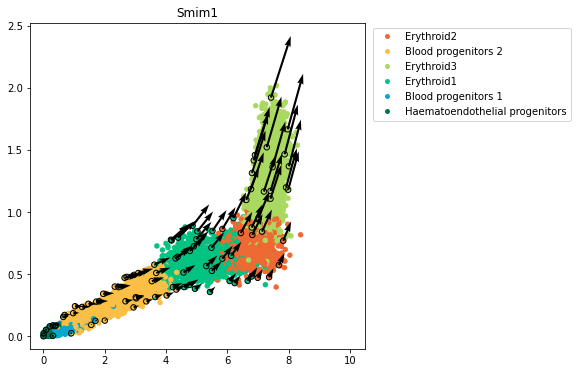

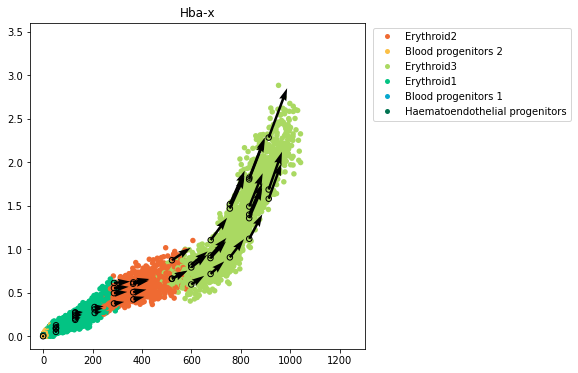

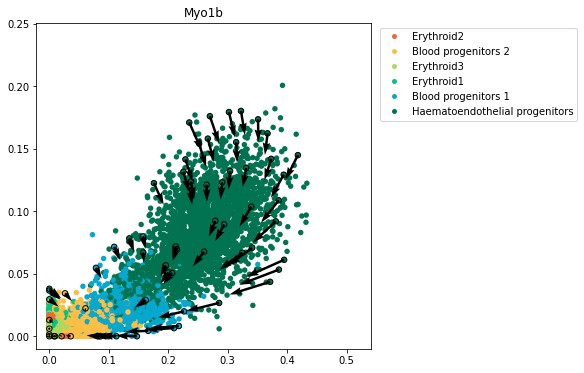

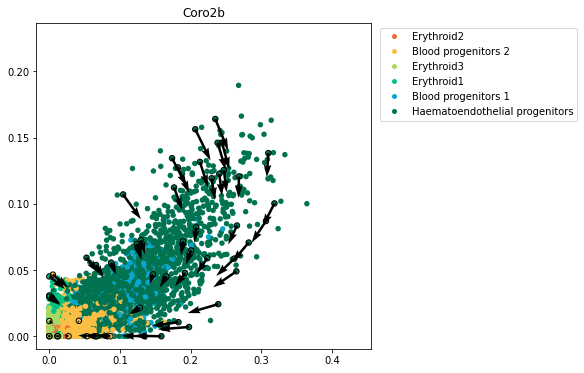

In [21]:
# gene velocity plot
colors = {'Erythroid2':grove2[6],
'Blood progenitors 2':grove2[5],
'Erythroid3':grove2[4],
'Erythroid1':grove2[3],
'Blood progenitors 1':grove2[2],
'Haematoendothelial progenitors':grove2[1],
'Blood progenitors 1':grove2[0]}

# vpl.velocity_gene('Smim1',load_cellDancer)
# vpl.velocity_gene('Hba-x',load_cellDancer)
# vpl.velocity_gene('Myo1b',load_cellDancer)
# vpl.velocity_gene('Coro2b',load_cellDancer)
# colors = {'Erythroid2':'purple',
# 'Blood progenitors 2':'orange',
# 'Erythroid3':'brown',
# 'Erythroid1':'red',
# 'Blood progenitors 1':'blue',
# 'Haematoendothelial progenitors':'pink',
# 'Blood progenitors 1':'blue'}

one_gene_raw=load_raw_data[load_raw_data.gene_list==load_raw_data.gene_list.iloc[0]]
cluster_info=one_gene_raw['clusters']

# for gene in gene_list_keep_fin[20:30]:
for gene in four_samples:
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1)

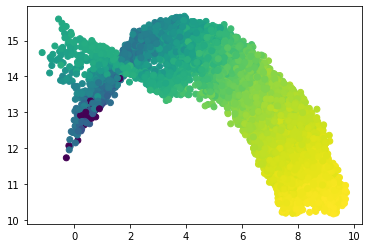

In [22]:
# Hba-x s0 in three clusters
load_raw_data_hba=load_raw_data[load_raw_data.gene_list.isin(['Hba-x'])].reset_index()
load_cellDancer_hba=load_cellDancer[load_cellDancer.gene_name.isin(['Hba-x'])].reset_index()
cell_keep=['Blood progenitors 2','Blood progenitors 1','Erythroid1']
load_raw_data_hba=load_raw_data_hba[load_raw_data_hba.clusters.isin(cell_keep)]
plt.scatter(load_raw_data_hba.embedding1, load_raw_data_hba.embedding2,c=np.log((load_raw_data_hba.s0+0.0001).to_numpy()))
# plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_level_s0/Hba-x_s0_21BP1_22BP2_23ERY1.pdf')

In [ ]:
# Hba-x s0 in three clusters
load_raw_data_hba=load_raw_data[load_raw_data.gene_list.isin(['Hba-x'])].reset_index().iloc[idx.idx]
load_cellDancer_hba=load_cellDancer[load_cellDancer.gene_name.isin(['Hba-x'])].reset_index()
cell_keep=['Blood progenitors 2','Blood progenitors 1','Erythroid1']
load_raw_data_hba=load_raw_data_hba[load_raw_data_hba.clusters.isin(cell_keep)]
plt.scatter(load_raw_data_hba.embedding1, load_raw_data_hba.embedding2,c=np.log((load_raw_data_hba.s0+0.0001).to_numpy()))
# plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_level_s0/Hba-x_s0_21BP1_22BP2_23ERY1.pdf')

In [ ]:
# START ----- transfer debug
def transfer(data_df,transfer_mode):
    print('tranfer mode: '+str(transfer_mode))
    if transfer_mode=='log':
        data_df.s0=np.log(data_df.s0+0.000001)
        data_df.u0=np.log(data_df.u0+0.000001)
    elif transfer_mode=='2power':
        data_df.s0=2**(data_df.s0)
        data_df.u0=2**(data_df.u0)
    elif transfer_mode=='power10':
        data_df.s0=(data_df.s0)**10
        data_df.u0=(data_df.u0)**10
    elif transfer_mode=='2power_norm_multi10':
        gene_order=data_df.gene_list.drop_duplicates()
        onegene=data_df[data_df.gene_list==data_df.gene_list[0]]
        cellAmt=len(onegene)
        data_df_max=data_df.groupby('gene_list')[['s0','u0']].max().rename(columns={'s0': 's0_max','u0': 'u0_max'})
        data_df_min=data_df.groupby('gene_list')[['s0','u0']].min().rename(columns={'s0': 's0_min','u0': 'u0_min'})
        data_df_fin=pd.concat([data_df_max,data_df_min],axis=1).reindex(gene_order)
        data_df_fin=data_df_fin.loc[data_df_fin.index.repeat(cellAmt)]
        data_df_combined=pd.concat([data_df.reset_index(drop=True) ,data_df_fin[['s0_max','u0_max','s0_min','u0_min']].reset_index(drop=True)],axis=1)
        data_df_combined['u0_norm']=''
        data_df_combined['s0_norm']=''
        data_df_combined.u0_norm=(data_df_combined.u0-data_df_combined.u0_min)/(data_df_combined.u0_max-data_df_combined.u0_min)
        data_df_combined.s0_norm=(data_df_combined.s0-data_df_combined.s0_min)/(data_df_combined.s0_max-data_df_combined.s0_min)
        data_df_combined.u0=2**(data_df_combined.u0_norm*10)
        data_df_combined.s0=2**(data_df_combined.s0_norm*10)
        data_df=data_df_combined
    elif transfer_mode==None:
        print('None')
    return (data_df)
transfer_mode='log'
test=transfer(load_raw_data,transfer_mode)
test

,gene_list,u0,s0,cellID,clusters,embedding1,embedding2
0,Sox17,9.999995e-07,9.999995e-07,cell_363,Blood progenitors 2,3.460521,15.574629
1,Sox17,9.999995e-07,9.999995e-07,cell_382,Blood progenitors 2,2.490433,14.971734
2,Sox17,9.999995e-07,9.999995e-07,cell_385,Blood progenitors 2,2.351203,15.267069
3,Sox17,9.999995e-07,9.999995e-07,cell_393,Blood progenitors 2,5.899098,14.388825
4,Sox17,9.999995e-07,9.999995e-07,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...
24657995,Gm47283,1.146025e-06,2.697128e+00,cell_139318,Erythroid3,8.032358,7.603037
24657996,Gm47283,5.108109e-06,1.401510e+00,cell_139321,Erythroid3,10.352904,6.446736
24657997,Gm47283,4.189118e-06,4.287320e+00,cell_139326,Erythroid3,9.464873,7.261099
24657998,Gm47283,2.230689e-06,2.052320e+00,cell_139327,Erythroid3,9.990495,7.243880


In [ ]:
# END ----- transfer debug



In [34]:
# debug of parallel for cell level embedding to get np_dMatrix_all and np_s0_all

from joblib import Parallel, delayed
import pandas as pd
import numpy as np

def data_reshape(load_cellDancer):
    '''
    load detail file
    return expression matrix and velocity (ngenes, ncells)
    '''
    psc = 1
    gene_names = load_cellDancer['gene_name'].drop_duplicates().to_list()
    # cell_number = load_cellDancer[load_cellDancer['gene_name']==gene_names[0]].shape[0]
    # load_cellDancer['index'] = np.tile(range(cell_number),len(gene_names))
    # load_cellDancer['index'] = 0
    load_cellDancer.loc[:,'index']=0
    for g in gene_names:
        load_cellDancer.loc[load_cellDancer['gene_name'] == g, 'index'] = range(
            load_cellDancer[load_cellDancer['gene_name'] == g].shape[0])
    s0_reshape = load_cellDancer.pivot(
        index='gene_name', values='s0', columns='index')
    s1_reshape = load_cellDancer.pivot(
        index='gene_name', values='s1', columns='index')
    dMatrix = s1_reshape-s0_reshape
    np_s0_reshape = np.array(s0_reshape)
    np_dMatrix = np.array(dMatrix)
    np_dMatrix2 = np.sqrt(np.abs(np_dMatrix) + psc) * \
        np.sign(np_dMatrix)  # (2159, 18140)
    return(np_s0_reshape, np_dMatrix2)



load_cellDancer_input=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/1_all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0/detail_e200.csv')
gene_list_full=load_cellDancer_input.gene_name.drop_duplicates()
gene_list_choice=gene_list_full[0:30]
load_cellDancer_input=load_cellDancer_input[load_cellDancer_input.gene_name.isin(gene_list_choice)]
process_gene_amt_each_job=100
gene_amt=len(set(load_cellDancer_input.gene_name))

def _s0_matrix_thread(data_index,load_cellDancer_input,process_gene_amt_each_job,gene_list_choice):
    # data_index:start index of gene in load_cellDancer_input
    
    if data_index+process_gene_amt_each_job<gene_amt:
        print('test1')
        load_cellDancer=load_cellDancer_input[load_cellDancer_input.gene_name.isin(gene_list_choice[data_index:(data_index+process_gene_amt_each_job)])]
    else:
        print('test2')
        load_cellDancer=load_cellDancer_input[load_cellDancer_input.gene_name.isin(gene_list_choice[data_index:,])]
    np_s0, np_dMatrix = data_reshape(load_cellDancer) 
    return([np_s0,np_dMatrix])
    

result = Parallel(n_jobs=10, backend="loky")(
    delayed(_s0_matrix_thread)(data_index=data_index,load_cellDancer_input=load_cellDancer_input,process_gene_amt_each_job=process_gene_amt_each_job,gene_list_choice=gene_list_choice)
    for data_index in range(0,gene_amt,process_gene_amt_each_job))

# combine result
for i,result_i in enumerate(result):
    print(i)
    np_s0=result_i[0]
    np_dMatrix=result_i[1]
    if i == 0:
        np_s0_all = np_s0
        np_dMatrix_all = np_dMatrix
    else:
        np_s0_all = np.vstack((np_s0_all, np_s0))
        np_dMatrix_all = np.vstack((np_dMatrix_all, np_dMatrix))

0


In [36]:
np_dMatrix_all.shape

(30, 12329)

In [ ]:
# Debug - NO Parallel version (slow) filter_gene_by_neighbor_sample_one_gene
def filter_gene_by_neighbor_sample_one_gene(gene,load_raw_data,step_i=None,step_j=None,cutoff_s0_zero_ratio=None,cutoff_u0_zero_ratio=None):
    print(gene)
    u_s= np.array(load_raw_data[load_raw_data['gene_list']==gene][["u0","s0"]]) # u_s
    sampling_idx=sampling_neighbors(u_s[:,0:2], step_i=step_i,step_j=step_j,percentile=15) # Sampling
    u_s_downsample = u_s[sampling_idx,0:4]
    u_s_df=pd.DataFrame({"s0":u_s_downsample[:, 1],'u0':u_s_downsample[:, 0]})
    u_s_df=u_s_df[~((u_s_df.s0==0) & (u_s_df.u0==0))]
    # print(u_s_df)
    u_s_df_zero_amt=u_s_df.agg(lambda x: x.eq(0).sum())
    sampled_gene_amt=len(u_s_df)
    u_s_df_zero_ratio=u_s_df_zero_amt/sampled_gene_amt
    # plt.figure(None,(6,6))
    # plt.scatter(u_s_df.s0,u_s_df.u0,alpha=0.1)
    # plt.show()
    # return [u_s_df_zero_ratio.s0,u_s_df_zero_ratio.u0]
    # return(u_s_df)
    if ~(u_s_df_zero_ratio.s0>cutoff_s0_zero_ratio or u_s_df_zero_ratio.u0>cutoff_u0_zero_ratio):
        return(gene)
    
def filter_gene_by_neighbor_sample(load_raw_data,gene_list=None,step_i=15,step_j=15,cutoff_s0_zero_ratio=0.2,cutoff_u0_zero_ratio=0.2):
    if gene_list is None:gene_list=load_raw_data.gene_list.drop_duplicates()
    
    gene_list_keep=[]
    for i,gene in enumerate(gene_list):
        print(i)
        filter_result=filter_gene_by_neighbor_sample_one_gene(gene,load_raw_data,step_i=step_i,step_j=step_j,cutoff_s0_zero_ratio=cutoff_s0_zero_ratio,cutoff_u0_zero_ratio=cutoff_u0_zero_ratio)
        if filter_result is not None:gene_list_keep.append(filter_result)
    return(gene_list_keep)

cutoff_s0_zero_ratio=0.2
cutoff_u0_zero_ratio=0.2
list_fin=[]
# gene_list_keep=filter_gene_by_neighbor_sample(load_raw_data)
gene_list_keep=filter_gene_by_neighbor_sample(load_raw_data,gene_list=['Smim1','Hba-x','Myo1b','Coro2b'])

print(gene_list_keep)

In [ ]:
# Debug parallel filter gene_by_neighbor_sample_one_gene
def filter_by_neighbor_sample_parallel(load_raw_data,step_i=15,step_j=15,cutoff_s0_zero_ratio=0.2,cutoff_u0_zero_ratio=0.2,gene_amt_each_job=100):
    '''filter genes with'''
    # parallel filter gene_by_neighbor_sample_one_gene
    def filter_gene_by_neighbor_sample_one_gene(gene,load_raw_data,step_i=None,step_j=None,cutoff_s0_zero_ratio=None,cutoff_u0_zero_ratio=None,gene_amt_each_job=None):
        # print(gene)
        u_s= np.array(load_raw_data[load_raw_data['gene_list']==gene][["u0","s0"]]) # u_s
        sampling_idx=sampling_neighbors(u_s[:,0:2], step_i=step_i,step_j=step_j,percentile=15) # Sampling
        u_s_downsample = u_s[sampling_idx,0:4]
        u_s_df=pd.DataFrame({"s0":u_s_downsample[:, 1],'u0':u_s_downsample[:, 0]})
        u_s_df=u_s_df[~((u_s_df.s0==0) & (u_s_df.u0==0))]
        # print(u_s_df)
        u_s_df_zero_amt=u_s_df.agg(lambda x: x.eq(0).sum())
        sampled_gene_amt=len(u_s_df)
        u_s_df_zero_ratio=u_s_df_zero_amt/sampled_gene_amt
        # plt.figure(None,(6,6))
        # plt.scatter(u_s_df.s0,u_s_df.u0,alpha=0.1)
        # plt.show()
        # return [u_s_df_zero_ratio.s0,u_s_df_zero_ratio.u0]
        # return(u_s_df)
        if ~(u_s_df_zero_ratio.s0>cutoff_s0_zero_ratio or u_s_df_zero_ratio.u0>cutoff_u0_zero_ratio):
            return(gene)

    def filter_gene_by_neighbor_sample(start_point,load_raw_data,gene_list=None,step_i=None,step_j=None,cutoff_s0_zero_ratio=None,cutoff_u0_zero_ratio=None,gene_amt_each_job=None):
        if start_point+gene_amt_each_job<len(load_raw_data.gene_list.drop_duplicates())
            gene_list=load_raw_data.gene_list.drop_duplicates()[start_point:(start_point+gene_amt_each_job)]
        else:
            gene_list=load_raw_data.gene_list.drop_duplicates()[start_point:,]
        print(gene_list)
        gene_list_keep=[]
        for i,gene in enumerate(gene_list):
            print(i)
            filter_result=filter_gene_by_neighbor_sample_one_gene(gene,load_raw_data,step_i=step_i,step_j=step_j,cutoff_s0_zero_ratio=cutoff_s0_zero_ratio,cutoff_u0_zero_ratio=cutoff_u0_zero_ratio,gene_amt_each_job=gene_amt_each_job)
            if filter_result is not None:gene_list_keep.append(filter_result)
        return(gene_list_keep)

    def parallel_get_gene(load_raw_data,gene_list=None,step_i=None,step_j=None,cutoff_s0_zero_ratio=None,cutoff_u0_zero_ratio=None,gene_amt_each_job=None):
        if gene_list is None:
            gene_list=load_raw_data.gene_list.drop_duplicates().reset_index(drop=True)
        else:
            load_raw_data=load_raw_data[load_raw_data.gene_list.isin(gene_list)]
        print(gene_list)
        result = Parallel(n_jobs=-1, backend="multiprocessing",verbose=10)(
            delayed(filter_gene_by_neighbor_sample)(start_point,load_raw_data,gene_list=gene_list,step_i=step_i,step_j=step_j,cutoff_s0_zero_ratio=cutoff_s0_zero_ratio,cutoff_u0_zero_ratio=cutoff_u0_zero_ratio,gene_amt_each_job=gene_amt_each_job)
            for start_point in range(0,len(gene_list),gene_amt_each_job))
        return(result)

    gene_list_keep=parallel_get_gene(load_raw_data,step_i=step_i,step_j=step_j,cutoff_s0_zero_ratio=cutoff_s0_zero_ratio,cutoff_u0_zero_ratio=cutoff_u0_zero_ratio,gene_amt_each_job=gene_amt_each_job)

    # combine parallel results
    gene_list_keep_fin=[]
    for segment_list in gene_list_keep:
        gene_list_keep_fin=gene_list_keep_fin+segment_list
    len(gene_list_keep_fin)
    gene_list_keep_fin_pd=pd.DataFrame({'gene_list':gene_list_keep_fin})

    return(gene_list_keep_fin_pd)

gene_list_keep_fin_pd=filter_by_neighbor_sample_parallel(load_raw_data,gene_amt_each_job=100)

gene_list_keep_fin_pd.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_velocity/gene_list_keep_fin_0.2cutoff.csv',index=False)

In [ ]:
# # DEPRECATED
# # Debug - filter gene by raw data s0 ratio and u0 ratio, filtering by raw data is deprecated.
# # Seems not working as expected, so change to filter after downsample by neighbor
# u0_ratio_cutoff=0.2
# s0_ratio_cutoff=0.2
# load_cellDancer=load_cellDancer_full.copy()
# def filter_raw(load_cellDancer,u0_ratio_cutoff,s0_ratio_cutoff):
#     gene_list=load_cellDancer.gene_name.drop_duplicates()
#     one_gene_raw=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.reset_index().gene_name[0]]

#     filter_table = load_cellDancer[['gene_name','u0','s0']].groupby('gene_name',sort=False).agg(lambda x: x.eq(0).sum())
#     cell_amt=len(one_gene_raw)
#     filter_table['u0_ratio']=(filter_table.u0)/cell_amt
#     filter_table['s0_ratio']=(filter_table.s0)/cell_amt
#     # plt.figure()
#     # filter_table.u0_ratio.hist(bins=100)
#     # plt.figure()
#     # filter_table.s0_ratio.hist(bins=100)
#     throw_by_u0_s0=filter_table[(filter_table.u0_ratio>u0_ratio_cutoff) | (filter_table.s0_ratio>s0_ratio_cutoff)].index
#     print('filter '+str(len(throw_by_u0_s0))+' genes')
#     filter_table[filter_table.index.isin(['Smim1','Hba-x','Myo1b','Coro2b'])]


#     load_cellDancer_filtered=load_cellDancer[~load_cellDancer.gene_name.isin(throw_by_u0_s0)]
#     return(load_cellDancer_filtered)
# load_cellDancer=filter_raw(load_cellDancer,u0_ratio_cutoff,s0_ratio_cutoff)
